        sepal_length_mean  sepal_width_mean  petal_length_mean  \
target                                                           
0                   5.006             3.428              1.462   
1                   5.936             2.770              4.260   
2                   6.588             2.974              5.552   

        petal_width_mean  
target                    
0                  0.246  
1                  1.326  
2                  2.026  

        sepal_length_std  sepal_width_std  petal_length_std  petal_width_std
target                                                                      
0               0.352490         0.379064          0.173664         0.105386
1               0.516171         0.313798          0.469911         0.197753
2               0.635880         0.322497          0.551895         0.274650

        sepal_length_range  sepal_width_range  petal_length_range  \
target                                                              
0        

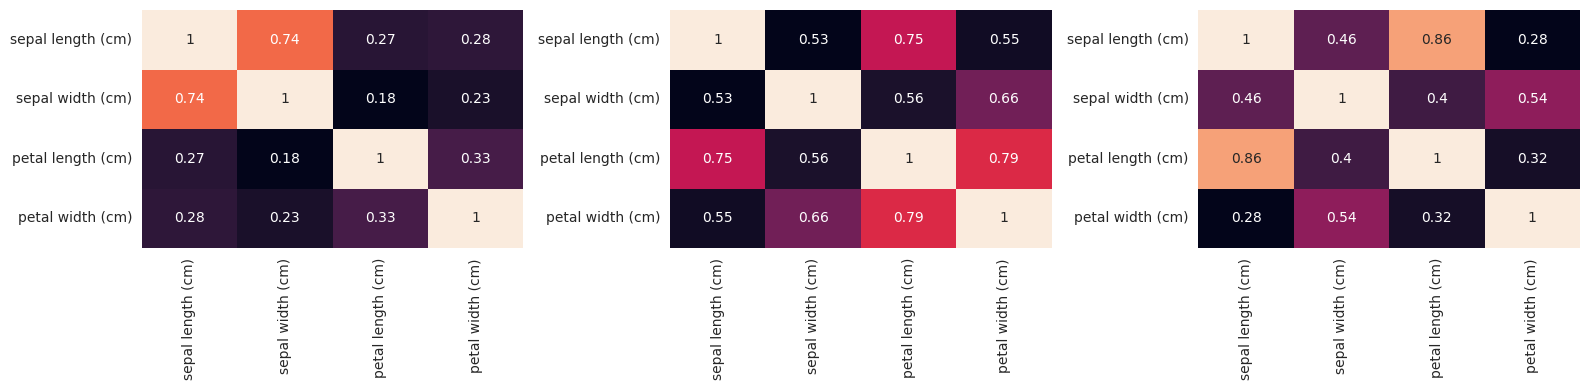

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

def calc_range(col):
    return col.max() - col.min()

iris_df = pd.read_csv('iris_dataset.csv')

iris_mean_df = iris_df.groupby('target').agg(
    sepal_length_mean=('sepal length (cm)', 'mean'),
    sepal_width_mean=('sepal width (cm)', 'mean'),
    petal_length_mean=('petal length (cm)', 'mean'),
    petal_width_mean=('petal width (cm)', 'mean'),
)
iris_std_df = iris_df.groupby('target').agg(
    sepal_length_std=('sepal length (cm)', 'std'),
    sepal_width_std=('sepal width (cm)', 'std'),
    petal_length_std=('petal length (cm)', 'std'),
    petal_width_std=('petal width (cm)', 'std'),
)
iris_range_df = iris_df.groupby('target').agg(
    sepal_length_range=('sepal length (cm)', calc_range),
    sepal_width_range=('sepal width (cm)', calc_range),
    petal_length_range=('petal length (cm)', calc_range),
    petal_width_range=('petal width (cm)', calc_range),
)
print(iris_mean_df, end='\n\n')
print(iris_std_df, end='\n\n')
print(iris_range_df, end='\n\n')

iris_group_0_df = iris_df[ iris_df['target'] == 0 ].drop('target', axis=1)
iris_group_1_df = iris_df[ iris_df['target'] == 1 ].drop('target', axis=1)
iris_group_2_df = iris_df[ iris_df['target'] == 2 ].drop('target', axis=1)

fig, ax = plt.subplots(1, 3, figsize=(16, 4))
sns.heatmap(iris_group_0_df.corr(), annot=True, cbar=False, ax=ax[0])
sns.heatmap(iris_group_1_df.corr(), annot=True, cbar=False, ax=ax[1])
sns.heatmap(iris_group_2_df.corr(), annot=True, cbar=False, ax=ax[2])
plt.tight_layout()
plt.show();


In [53]:
# No.5
clipped_iris_df = iris_df[ ['sepal width (cm)', 'sepal length (cm)'] ]
p_test = clipped_iris_df.tail(1)
p_test_class = iris_df.iloc[-1]['target']

knn_idx = np.argpartition(clipped_iris_df.iloc[:-1, :].apply(lambda row: np.sqrt(np.sum((row.values - p_test.values) ** 2)), axis=1), kth=1)

p_predict_class = iris_df.iloc[knn_idx[0]]['target']
print('predict: ', p_predict_class == p_test_class)

print(iris_df.iloc[knn_idx[1]]['target'] == p_predict_class)
print(iris_df.iloc[knn_idx[2]]['target'] == p_predict_class)
print(iris_df.iloc[knn_idx[3]]['target'] == p_predict_class)
# print(iris_df.iloc[knn_id[4]]['target'] == p_predict_class)
# print(iris_df.iloc[knn_id[5]]['target'] == p_predict_class)


predict:  False
False
True
True


In [54]:
# No.6
p_test_class = iris_df.iloc[-1]['target']
p_test = iris_df.tail(1).drop('target', axis=1)

knn_idx = np.argpartition(np.linalg.norm(iris_df.iloc[:-1, :-1].values - p_test.values, axis=1), kth=3)
print('Accuracy in non-normalized mode:')
print(iris_df.iloc[knn_idx[0]]['target'] == p_test_class)
print(iris_df.iloc[knn_idx[1]]['target'] == p_test_class)
print(iris_df.iloc[knn_idx[2]]['target'] == p_test_class, end='\n\n')

# just normalize training samples without p_test
normalized_iris_df = iris_df.iloc[:-1, :-1].apply(lambda col: (col - col.mean() / col.std()))
# p_test = normalized_iris_df.tail(1)

knn_idx = np.argpartition(np.linalg.norm(normalized_iris_df.iloc[:-1, :].values - p_test.values, axis=1), kth=3)
print('Accuracy in normalized mode:')
print(iris_df.iloc[knn_idx[0]]['target'] == p_test_class)
print(iris_df.iloc[knn_idx[1]]['target'] == p_test_class)
print(iris_df.iloc[knn_idx[2]]['target'] == p_test_class, end='\n\n')



Accuracy in non-normalized mode:
True
True
True

Accuracy in normalized mode:
True
True
True

